# 보스톤 집값 데이터셋을 이용한 다중선형회귀 모델 구축 및 평가

## 필요한 모듈


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

####  데이터 수집

In [8]:
from sklearn import datasets
#데이터셋을 로드
boston=datasets.fetch_openml('boston')
boston

c:\Users\gihun\Python_Data\lib\site-packages\sklearn\datasets\_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
c:\Users\gihun\Python_Data\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
 0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
 1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
 2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
 3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
 4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
 ..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
 501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
 502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
 503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
 504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
 505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   9.14  
 2       

####  데이터 이해

In [1]:
#데이터셋 정보확인
# attribute의 의미
'''
CRIM: 지역별 범죄 발생률
 ZN: 25,000평방피트를 초과하는 거주 지역 비율
 INDUS: 비상업 지역의 넓이 비율
 CHAS: 찰스강의 더미변수(1은 강의 경계, 0은 경계 아님)
 NOX: 일산화질소 농도
 RM: 거주할 수 있는 방 개수
 AGE: 1940년 이전에 건축된 주택 비율
 DIS: 5개 주요 고용센터까지 가중 거리
 RAD: 고속도로 접근 용이도
TAX: 10,000달러당 재산세 비율  
PTRATIO: 지역의 교사와 학생 수 비율  
B: 지역의 흑인 거주 비율  
LSTAT: 하위 계층의 비율  
PRICE(MEDV): 본인 소유 주택 가격의 중앙값
'''

'\nCRIM: 지역별 범죄 발생률\n ZN: 25,000평방피트를 초과하는 거주 지역 비율\n INDUS: 비상업 지역의 넓이 비율\n CHAS: 찰스강의 더미변수(1은 강의 경계, 0은 경계 아님)\n NOX: 일산화질소 농도\n RM: 거주할 수 있는 방 개수\n AGE: 1940년 이전에 건축된 주택 비율\n DIS: 5개 주요 고용센터까지 가중 거리\n RAD: 고속도로 접근 용이도\nTAX: 10,000달러당 재산세 비율  \nPTRATIO: 지역의 교사와 학생 수 비율  \nB: 지역의 흑인 거주 비율  \nLSTAT: 하위 계층의 비율  \nPRICE(MEDV): 본인 소유 주택 가격의 중앙값\n'

In [12]:
boston.feature_names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [4]:
dir(boston)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

![image.png](./images/boston_features.png)

In [13]:
boston.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [14]:
# 독립변수(피처)와 종속변수를 DataFrame자료형으로 변환
# 데이터셋 객체의 data 배열, 즉, 독립변수 X가되는 피처(특성)들을 DataFrame자료형으로 변환하여
# boston_df생성
# boston_df.head() 데이터 5개 확인
boston_df = boston.data
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [17]:
# 데이터셋 객체의 target배열(boston.target)을 종속 변수인 주택 가격("PRCIE") 컬럼으로 추가
boston_df['Price'] = boston.target
boston_df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [18]:
#데이터의 크기와 형태를 확인
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  Price    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [ ]:
# 데이터프레임 정보


#### 데이터 이해:  데이터 선정 및 분포 정보 확인

In [ ]:
# CHAS : 찰스강변 데이터 - 연속형 값이 아닌 카테고리형 , 분석 대상에 제외한다.

In [19]:
# CHAS 컬럼 확인
boston_df.drop(['CHAS'],axis=1,inplace=True)
boston_df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [21]:
boston_df.drop(['RAD'],axis=1,inplace=True)

In [25]:
# 독립변수와  종속변수와의 관계에 대한 산점도 시각화 (subplot을 이용해서 하나로 그려보기)
f_features = [ _ for _ in list(boston_df.columns)[:-1] if _ != 'CHAS']
f_features

['CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

### 컬럼 별로 독립변수간의 상관관계 시각화(다중공선성이 의심되는 독립변수들)


0 CRIM
1 ZN
2 INDUS
3 NOX
4 RM
5 AGE
6 DIS
7 TAX
8 PTRATIO
9 B
10 LSTAT


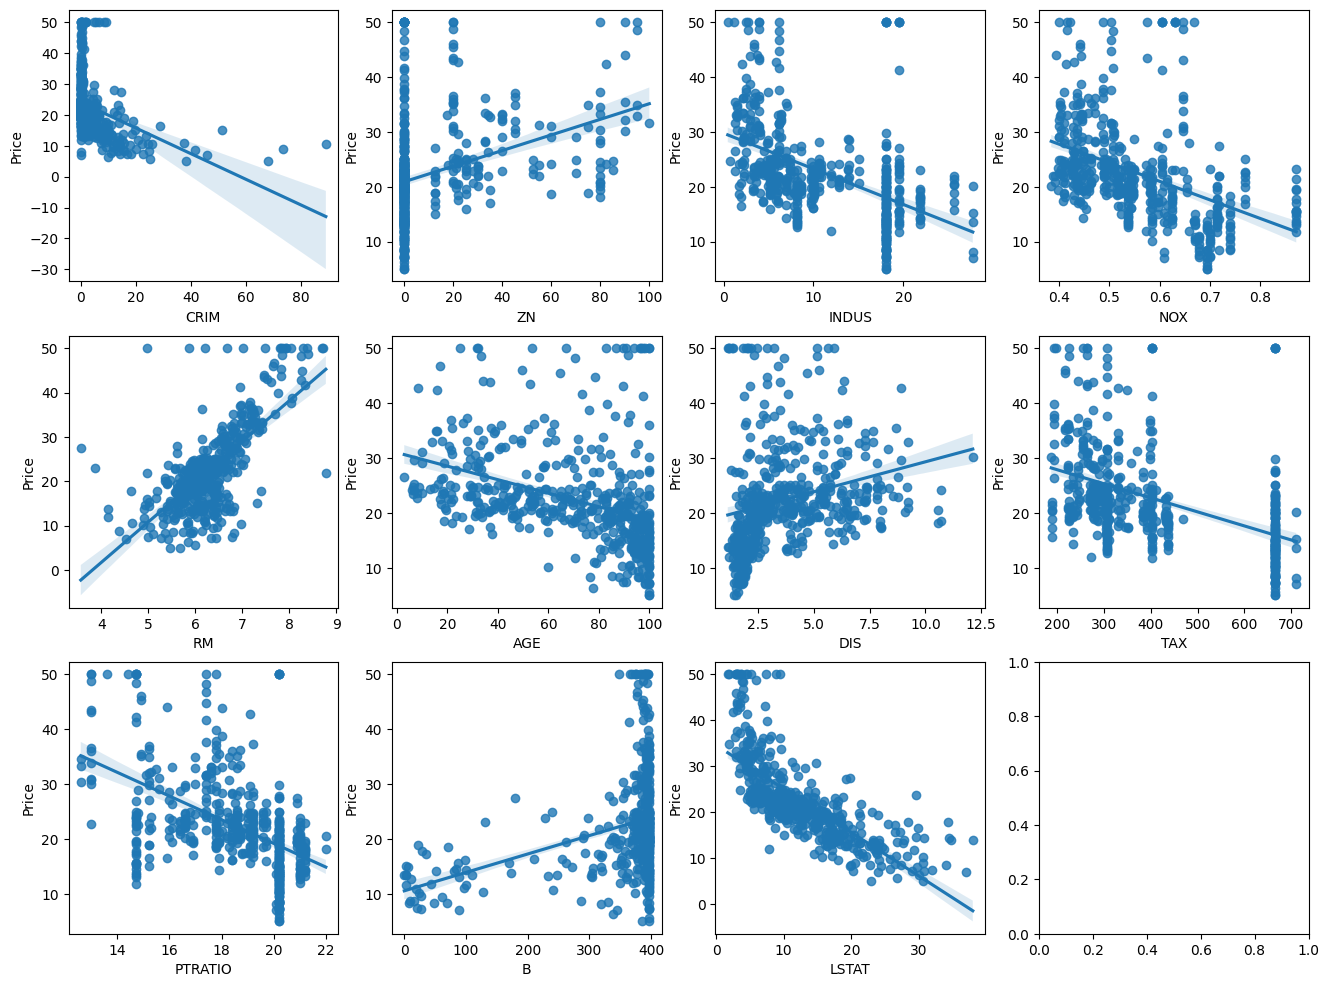

In [30]:
# 각각의 독립변수와 종속 변수 간의 관계를 시각화하여 subplot으로 그림

import matplotlib.pyplot as plt
import seaborn as sns

# subplot 캔버스를 준비한다!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
fix, ax = plt.subplots(figsize=(16,12), nrows = 3, ncols = 4)
for idx, feature in enumerate(boston_df.columns[:-1]):
    row = int(idx / 4)
    col = idx % 4
    print(idx, feature)
    sns.regplot(x=feature,y='Price',data=boston_df, ax=ax[row][col])

#### pairplot(): 수치형 변수에 적용 가능

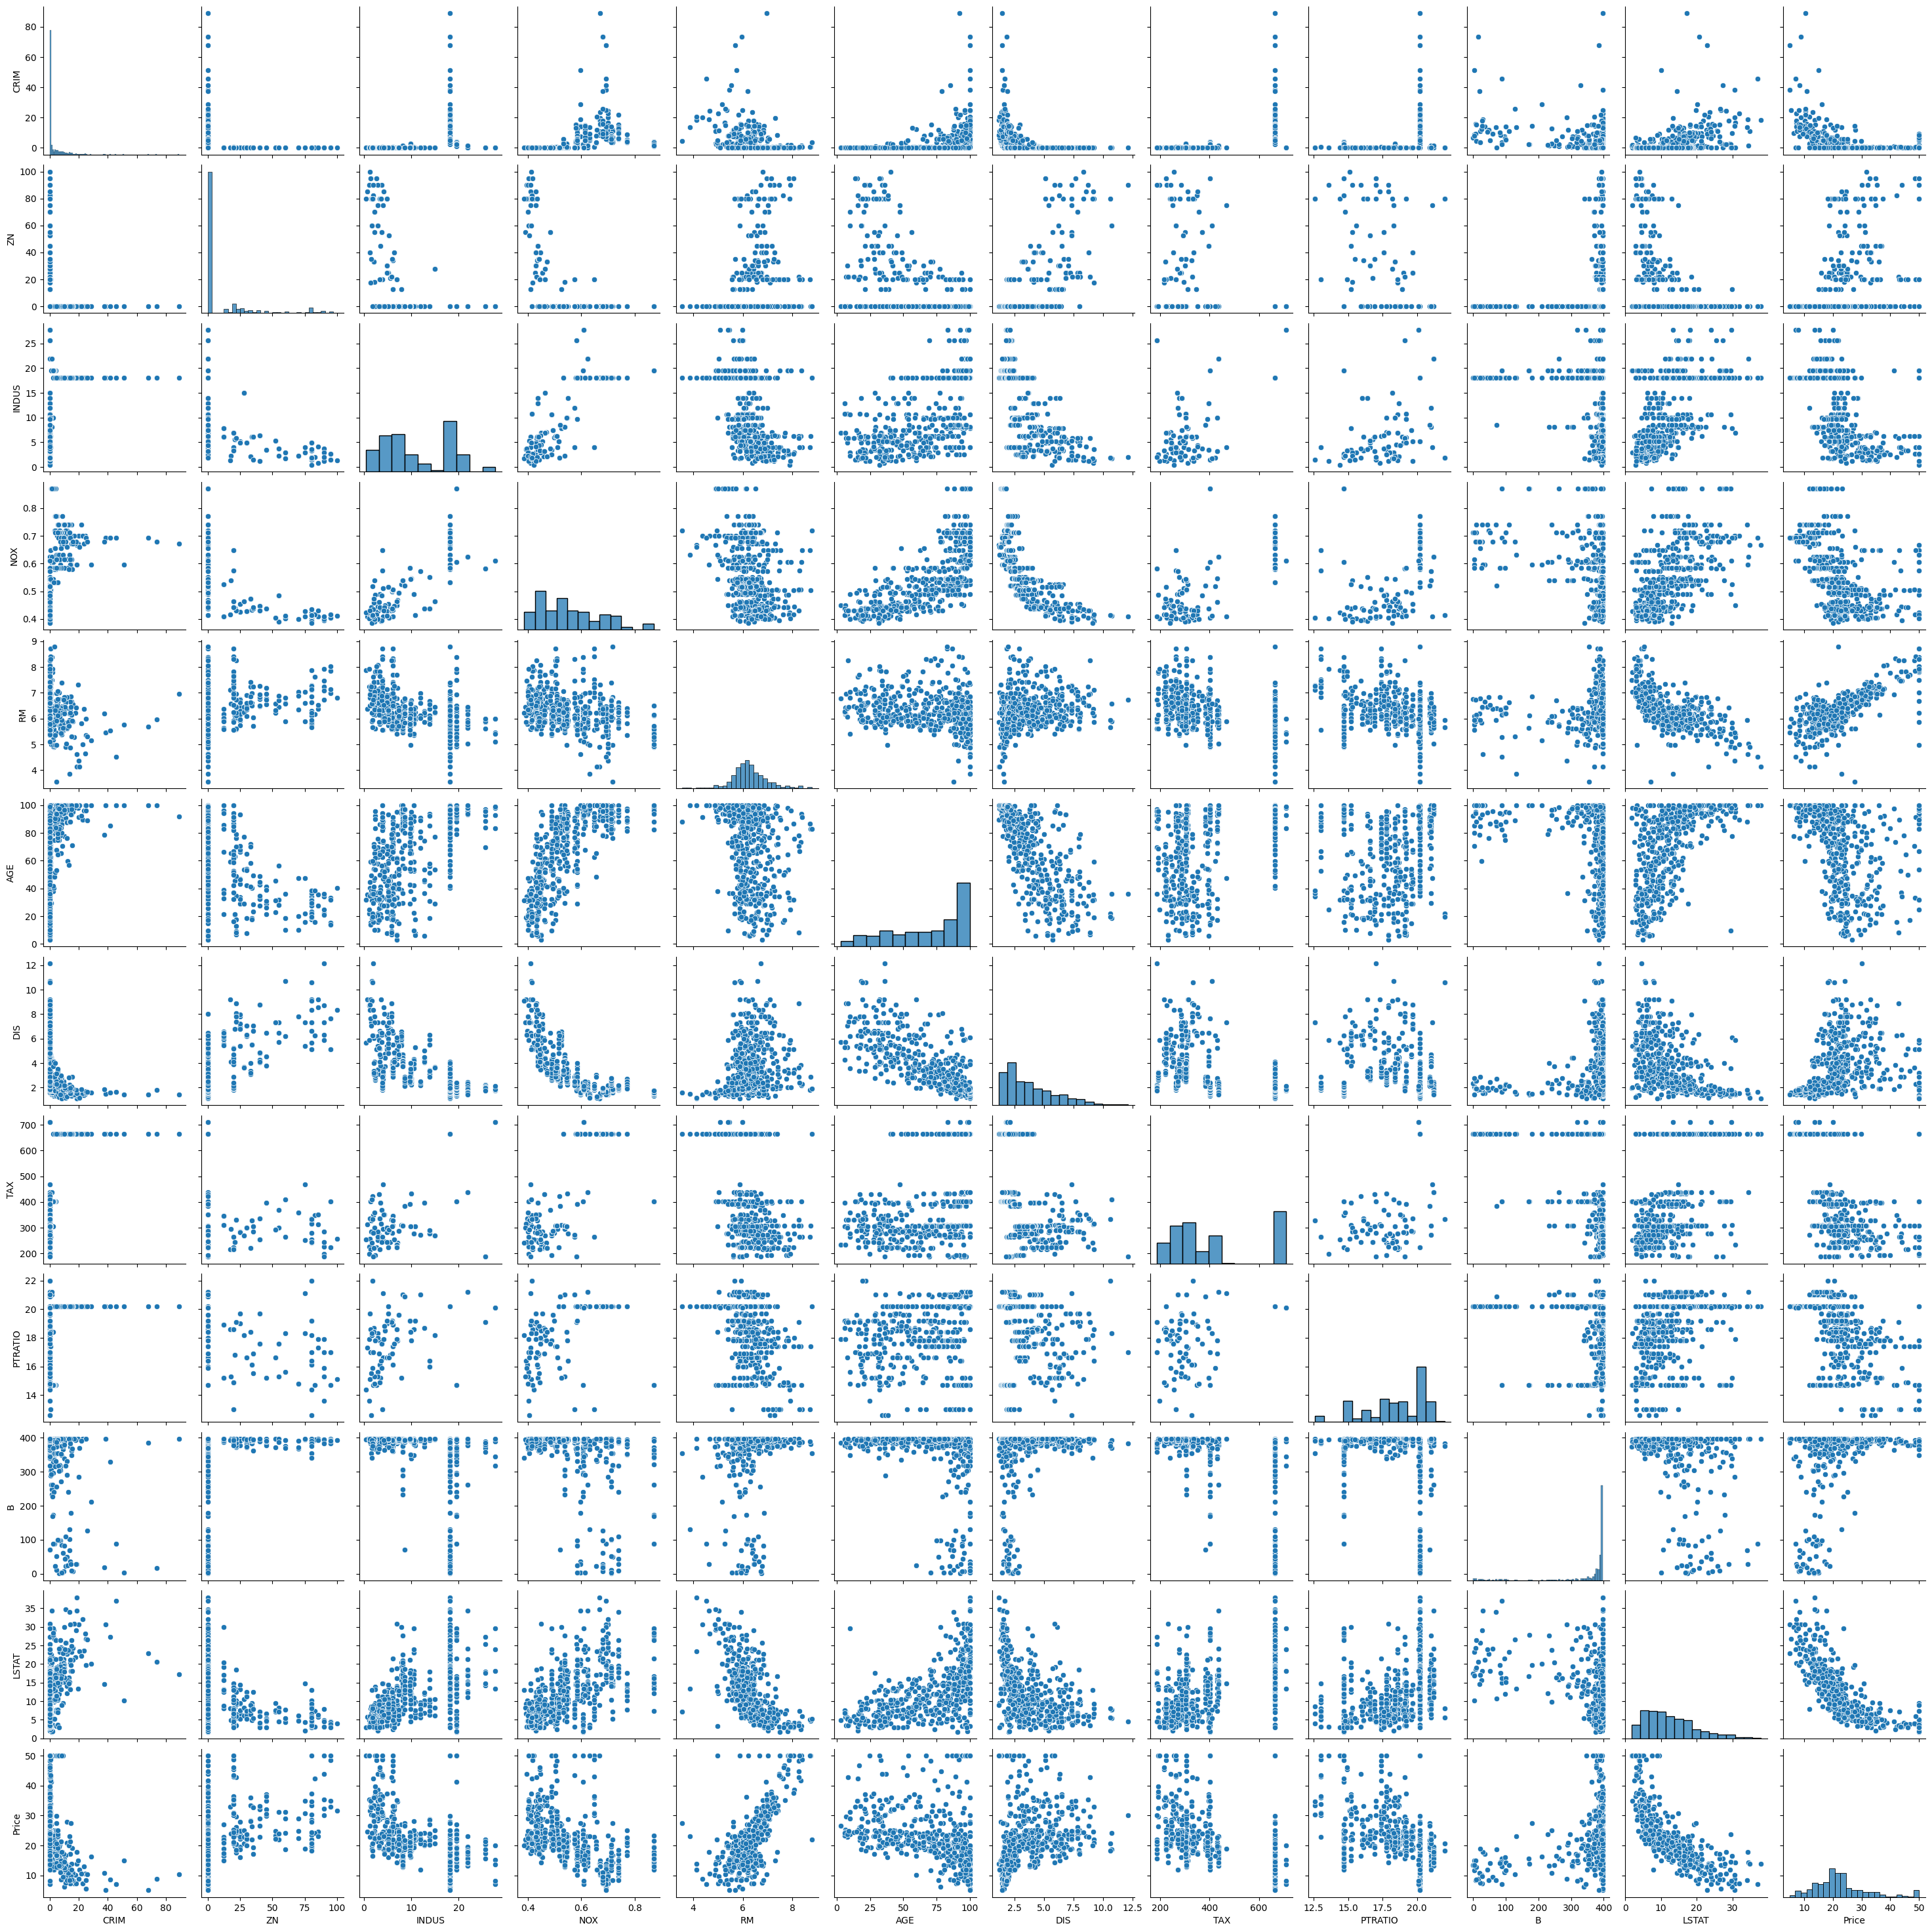

In [35]:
features = boston_df.columns[:]
#features = ['INDUS','LSTAT','RM','Price'] # 주대각선은 분포를 보여주는 barplot으로 나타나게 됨.
sns.pairplot(boston_df[features])

<AxesSubplot: >

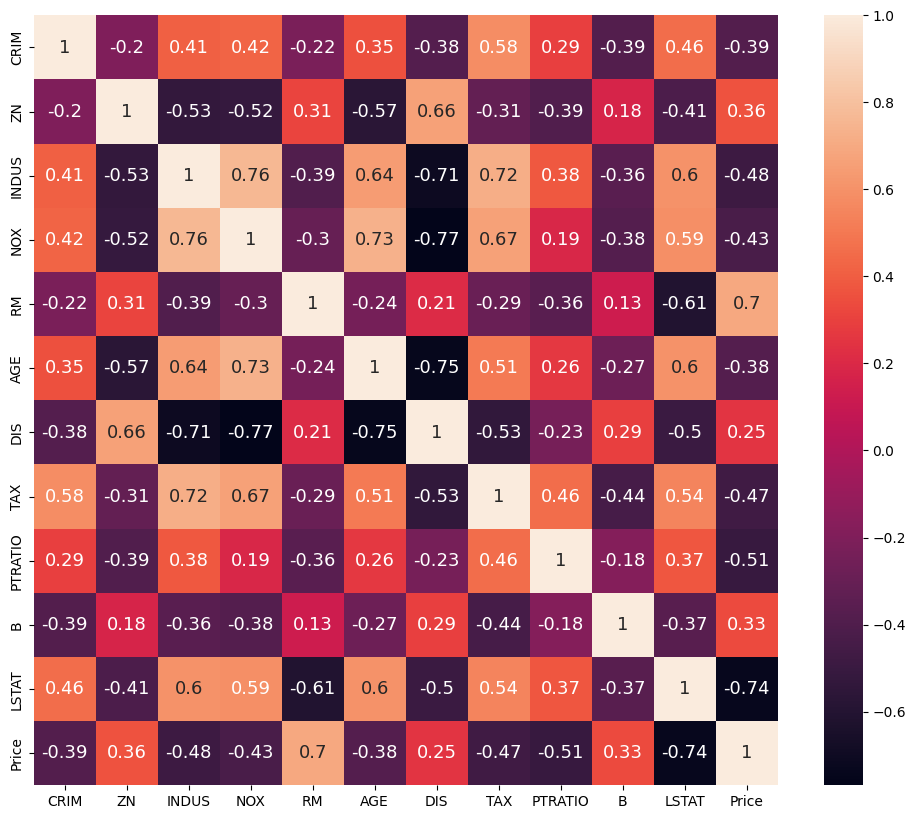

In [42]:
# 컬럼 별로 독립변수간의 상관관계 히트맵 시각화
# heatmap()
corr_df = boston_df[features].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_df,annot=True,annot_kws={'size':13})

In [ ]:


# 전체 컬럼에서 상호간의 관계를 파악할 변수들을 선정한다


# 변수 간의 상관 계수를 구한다

#상관 계수 값에 대한 히트맵
#매개변수 annot: 맵에 값 표시 여부 지정
#매개변수 annot_kws: 표시되는 값에 대한 추가 옵션



# 보스턴 집값 다중선형회귀 분석(사이킷런)

In [ ]:
# 데이터 준비, 탐색은 위에서 수행한 것으로 대체

In [43]:
boston_df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48,22.0


### 데이터 준비

#### 데이터 분할

In [45]:
# X(독립변수), Y(종속변수) 분할
X=boston_df[boston_df.columns[:-1]] # boston_df.drop(['Price'],axis=1)
y=boston_df['Price']
# 학습용 데이터와 평가용 데이터로 분할하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [47]:
#X_train 데이터 일부 확인
X_train.shape

(354, 11)

### 모델 클래스 선택

In [48]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()

### 모델 구축 

In [55]:
#학습 수행
reg = Lr.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)


[ -0.1    0.03   0.01 -12.36   4.41  -0.01  -1.39   0.    -0.84   0.01
  -0.56]
25.26057489231045


In [54]:
# 소숫점 프린트 출력 형식 정하기
pd.options.display.float_format = '{:.3f}'.format
np.set_printoptions(precision=2, suppress=True)

### 모델 평가

In [58]:
def get_score(y_test,y_pred):
    mse = mean_squared_error(y_test,y_pred)
    return mse , np.sqrt(mse), r2_score(y_test,y_pred)

In [59]:
get_score(y_test,y_pred)

(23.51759959647691, 4.849494777446091, 0.6843830011724996)

In [57]:

from sklearn.metrics import mean_squared_error,r2_score
# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기
y_pred = reg.predict(X_test)

# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(mse,rmse,r2)

23.51759959647691 4.849494777446091 0.6843830011724996


In [143]:
# 수정된 결정 계수 확인(Ajusted-R2)


#데이터의 크기
n = len(X_train)
#독립변수의 갯수
k = len(X_train.columns)

# 수정된 결정 계수
ajd_r2 = 1-((1-r2)*(n-1)/(n-k-1))
ajd_r2

353


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

![image.png](./images/adjusted_r2.png)

#### 회귀 계수 확인 : 각각의 독립 변수의 설명력 확인

In [ ]:
# 회귀 계수 확인: 각각의 독립변수의 설명력 확인

# ndarray의 실수를 부동 소수점으로 출력

# 회귀 계수와 절편 값 확인

# ndarray의 실수 출력 옵션 복구


In [ ]:
# 본래의 출력 옵션


In [62]:
#회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 시리즈 자료형으로 만들고,
coef = pd.Series(data=reg.coef_,index=X_train.columns)
#회귀 계수값을 기준으로 내림차순으로 정렬
coef.sort_values(ascending=False)


RM          4.412
ZN          0.029
B           0.012
INDUS       0.008
TAX         0.002
AGE        -0.013
CRIM       -0.104
LSTAT      -0.560
PTRATIO    -0.840
DIS        -1.387
NOX       -12.360
dtype: float64

In [ ]:
#회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 
#시리즈 자료형으로 만듦


###  실제값과 예측값의 분포차이를 시각화

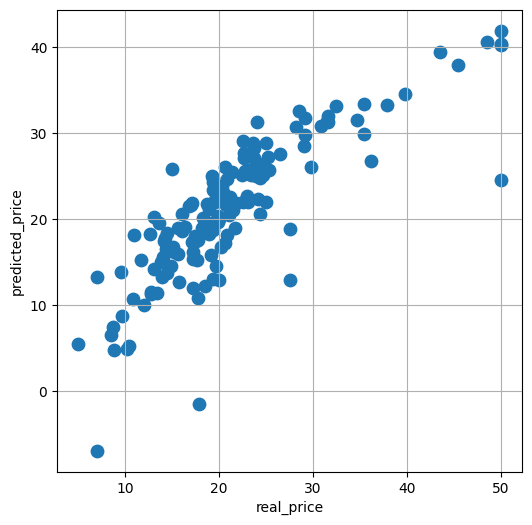

In [64]:
# 독립변수가 여러 개일 때 모델의 성능을 시각화하려면 실제값과 예측값의 분포차이를 그린다
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, s=80)
plt.xlabel('real_price')
plt.ylabel('predicted_price')
plt.grid()
plt.show()

# 보스턴 집값: 다중선형회귀 분석(스탯츠모델)

In [ ]:
# 최소 제곱법으로 객체 생성, 학습, 예측, 평가를 진행한다.



# 훈련 데이터로 학습 수행

# 검증 데이터로 예측 수행

#평가 지표 값 확인


# [응용1] 다중 선형회귀 연습 - load_diabetes

### 필요한 모듈 import

In [62]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd

### 데이터 수집

In [63]:
diab = load_diabetes()
diab

{'data': array([[ 0.04,  0.05,  0.06, ..., -0.  ,  0.02, -0.02],
        [-0.  , -0.04, -0.05, ..., -0.04, -0.07, -0.09],
        [ 0.09,  0.05,  0.04, ..., -0.  ,  0.  , -0.03],
        ...,
        [ 0.04,  0.05, -0.02, ..., -0.01, -0.05,  0.02],
        [-0.05, -0.04,  0.04, ...,  0.03,  0.04, -0.03],
        [-0.05, -0.04, -0.07, ..., -0.04, -0.  ,  0.  ]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
        128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
        150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
        200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
         42., 111.,  98., 164.,  

### 데이터 이해

In [64]:
dir(diab)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [88]:
diab_df = pd.DataFrame(data=diab.data,columns=diab.feature_names)
diab_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038,0.051,0.062,0.022,-0.044,-0.035,-0.043,-0.003,0.020,-0.018
1,-0.002,-0.045,-0.051,-0.026,-0.008,-0.019,0.074,-0.039,-0.068,-0.092
2,0.085,0.051,0.044,-0.006,-0.046,-0.034,-0.032,-0.003,0.003,-0.026
3,-0.089,-0.045,-0.012,-0.037,0.012,0.025,-0.036,0.034,0.023,-0.009
4,0.005,-0.045,-0.036,0.022,0.004,0.016,0.008,-0.003,-0.032,-0.047
...,...,...,...,...,...,...,...,...,...,...
437,0.042,0.051,0.020,0.060,-0.006,-0.003,-0.029,-0.003,0.031,0.007
438,-0.006,0.051,-0.016,-0.068,0.049,0.079,-0.029,0.034,-0.018,0.044
439,0.042,0.051,-0.016,0.017,-0.037,-0.014,-0.025,-0.011,-0.047,0.015
440,-0.045,-0.045,0.039,0.001,0.016,0.015,-0.029,0.027,0.045,-0.026


In [65]:
print(diab.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [66]:
diab.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [67]:
diab.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [68]:
print()
print(diab.data.shape)


(442, 10)


In [69]:
diab.target.shape

(442,)

### 데이터 준비

In [70]:
X = diab.data
y = diab.target
print(X,y)

[[ 0.04  0.05  0.06 ... -0.    0.02 -0.02]
 [-0.   -0.04 -0.05 ... -0.04 -0.07 -0.09]
 [ 0.09  0.05  0.04 ... -0.    0.   -0.03]
 ...
 [ 0.04  0.05 -0.02 ... -0.01 -0.05  0.02]
 [-0.05 -0.04  0.04 ...  0.03  0.04 -0.03]
 [-0.05 -0.04 -0.07 ... -0.04 -0.    0.  ]] [151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)

### 모델 구축

In [72]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()

In [73]:
reg = Lr.fit(X_train,y_train)

In [74]:
y_pred = reg.predict(X_test)
y_pred.shape

(89,)

### 모델 평가

In [75]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print()
print(f'mse is {mse: .3f} and rmse is {rmse: .3f} and r2 is {r2: .3f}')



mse is  2712.489 and rmse is  52.082 and r2 is  0.395


In [153]:
n = len(X_train)
k = len(diab.feature_names)
adj_r2 = 1-((1-r2)*(n-1)/(n-k-1))
print()
print(adj_r2)


0.3776649827895002


#### 회귀 계수 확인 : 각각의 독립 변수의 설명력 확인

In [76]:
wn = reg.coef_ 
w0 = reg.intercept_
print()
print(reg.coef_)
print(reg.intercept_)


[  42.13 -256.72  585.67  300.38 -870.33  492.32  184.86  262.17  772.19
   54.45]
150.8602523396147


In [77]:
pd.options.display.float_format = '{:.3f}'.format
np.set_printoptions(precision=2, suppress=True)

In [78]:
print()
print(f'y={w0:.2f} ',end='')
for i in range(len(wn)):
    print(f'+ {wn[i]:.2f}x{i+1}',end='')


y=150.86 + 42.13x1+ -256.72x2+ 585.67x3+ 300.38x4+ -870.33x5+ 492.32x6+ 184.86x7+ 262.17x8+ 772.19x9+ 54.45x10

###  실제값과 예측값의 분포차이를 시각화

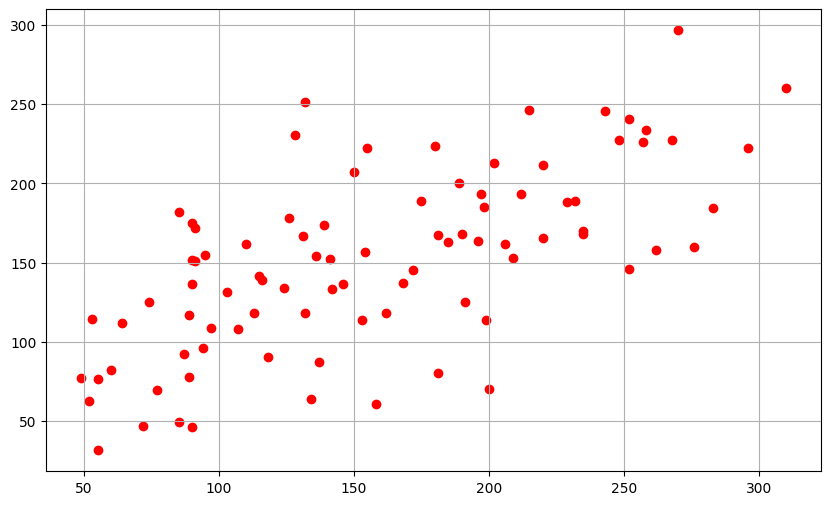

In [89]:
# 실제 값과 예측 값의 차이를 그래프로 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,c='r')
plt.grid()
plt.show()

# [응용2] 캘리포니아 주택 가격

<img src='./images/cali_house_features.png' width="450" height="450"/>

### 데이터 수집 및 탐색

In [104]:
#fetch data이므로 온라인으로만 fetch가능
# 온라인 아닌경우 :  pd.read_csv('./data/california_dataset.csv')
california_dataset = pd.read_csv('C:/Users/gihun/python_Data/data/california_dataset.csv')
print()
california_dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.325,41.000,6.984,1.024,322.000,2.556,37.880,-122.230,4.526
1,8.301,21.000,6.238,0.972,2401.000,2.110,37.860,-122.220,3.585
2,7.257,52.000,8.288,1.073,496.000,2.802,37.850,-122.240,3.521
3,5.643,52.000,5.817,1.073,558.000,2.548,37.850,-122.250,3.413
4,3.846,52.000,6.282,1.081,565.000,2.181,37.850,-122.250,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.560,25.000,5.045,1.133,845.000,2.561,39.480,-121.090,0.781
20636,2.557,18.000,6.114,1.316,356.000,3.123,39.490,-121.210,0.771
20637,1.700,17.000,5.206,1.120,1007.000,2.326,39.430,-121.220,0.923
20638,1.867,18.000,5.330,1.172,741.000,2.123,39.430,-121.320,0.847


In [ ]:
# 샘플:20640

In [ ]:
#속성 :8개

### 시각화로 탐색

In [91]:
#데이터프레임으로 변환

# 기초 통계량 확인
california_dataset.info() # notnull 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


# 독립변수 간 상관관계 확인
# 유의미한 관계를 보인것 같은 

0 MedInc
1 HouseAge
2 AveRooms
3 AveBedrms
4 Population
5 AveOccup
6 Latitude
7 Longitude


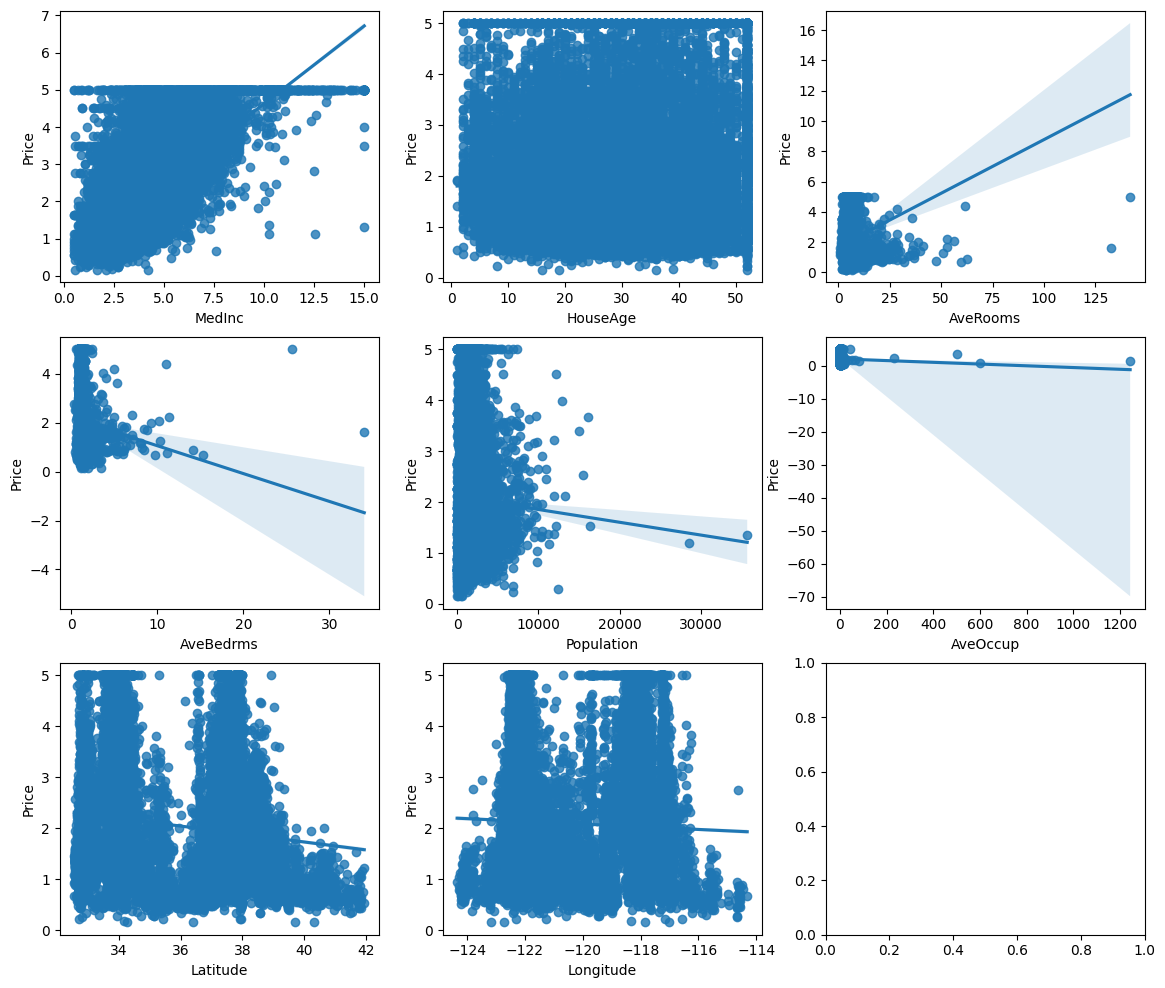

In [97]:
# 종속(price)변수 VS 독립변수(8개)  관계 시각화 탐색
import seaborn as sns
fig, ax = plt.subplots(figsize=(14,12),nrows=3,ncols=3)
for idx , feature in enumerate(california_dataset.columns[:-1]):
    row = idx // 3
    col = idx % 3
    print(idx,feature)
    sns.regplot(x=feature,y='Price',data=california_dataset,ax=ax[row][col])

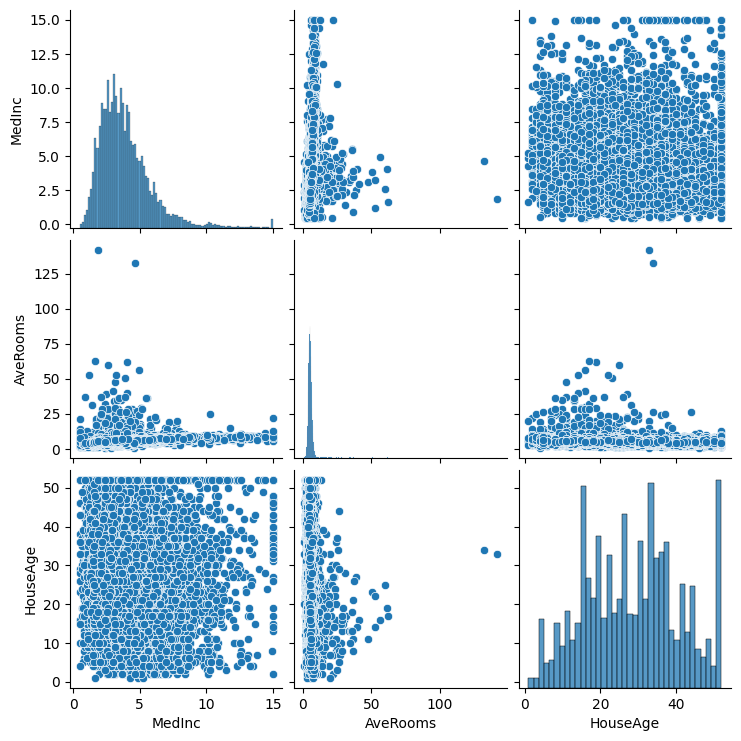

In [106]:
# 독립변수 간 상관관계 확인
# 전체 컬럼에서 상호간의 관계를 파악할 변수들을 선정한다
#pairplot 시각화
# 유의미한 관계를 보인것 같은 MedInc와 AveRooms, HouseAge만 골라보고 싶었음
feature_list = ['MedInc','AveRooms','HouseAge']
sns.pairplot(california_dataset[feature_list])

In [ ]:


# 전체 컬럼에서 상호간의 관계를 파악할 변수들을 선정한다

#pairplot 시각화


In [ ]:
# 위경도 데이터 시각화

# 위경도 정보에 따라 블록별로 산점도를 그리되 거주 인구수에 비례하게 점의 크기를 정하고, 주택 가격에 따라 점의 색깔을 다르게 한다


<AxesSubplot: >

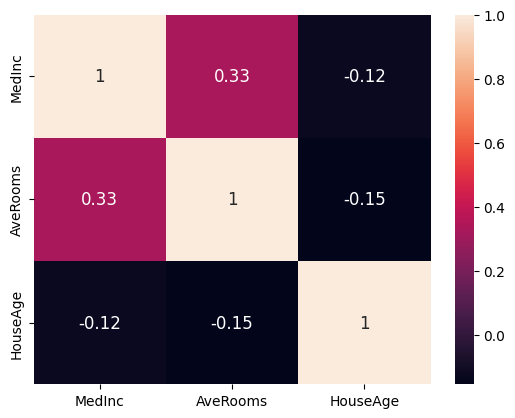

In [108]:
# 상관 계수 히트맵

# 전체 컬럼에서 상호간의 관계를 파악할 변수들을 선정한다


# 변수 간의 상관 계수를 구한다

#상관 계수 값에 대한 히트맵
#매개변수 annot: 맵에 값 표시 여부 지정
#매개변수 annot_kws: 표시되는 값에 대한 추가 옵션
corr = california_dataset[feature_list].corr()
sns.heatmap(corr,annot=True,annot_kws={'size':12})


In [132]:
# 선형회귀 모델 구축
from sklearn.linear_model import LinearRegression
Lr2 = LinearRegression()
# 분리
X_train2, X_test2, y_train2, y_test2 = train_test_split(california_dataset.drop(columns='Price').values,california_dataset['Price'],test_size=0.2,random_state=27)
X_train2.shape
# 회귀식으로 표현
reg2 = Lr2.fit(X_train2, y_train2)
wn = reg2.coef_
w0 = reg2.intercept_
print()
print(f'y = {w0} ',end='')
for i in range(len(wn)):
    print(f'+ {wn[i]:.2f}x{i+1}',end='')

# 결과 시각화 ( actual price VS predicted price)


y = -37.263413513024595 + 0.44x1+ 0.01x2+ -0.12x3+ 0.80x4+ 0.00x5+ -0.00x6+ -0.42x7+ -0.44x8

In [149]:


# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기
y_pred2 = reg2.predict(X_test2)
print()
print(y_pred2)
# 평가 지표 계산
mse2 = mean_squared_error(y_test2,y_pred2)
rmse2 = np.sqrt(mse2)
r2_ = r2_score(y_test2,y_pred2) # 캘리포니아 결정 계수
print(mse2, rmse2, r2_)
n2 = len(X_train2)
k2 = len(california_dataset.columns[:-1])
# 수정된 결정 계수 확인(Ajusted-R2)
adj_r2_ = 1-((1-r2_)*(n2-1))/(n2-k2-1)
#데이터의 크기
print(n2)
#독립변수의 갯수
print(k2)
# 수정된 결정 계수
print(adj_r2_)


[1.71 2.14 1.6  ... 2.49 1.55 2.19]
0.5423293447570139 0.7364301356931382 0.5886851927020104
16512
8
0.5884858035934614


# [도전] 펭귄 몸무게 예측(dacon)

# [도전] 자전거 대여 수요 예측(Kaggle)

- datetime: hourly date + timestamp
- season: 1=봄, 2=여름, 3=가을, 4=겨울
- holiday: 1=토, 일요일의 주말을 제외한 국경일 등의 휴일, 0= 휴일이 아닌 날
- workingday: 1=토, 일요일의 주말 및 휴일이 아닌 주중, 0=주말 및 휴일
- weather:
* 1 : 맑음, 약간 구름 낀 흐림
* 2 : 안개, 안개  + 흐림
* 3 : 가벼운 눈, 가벼운 비 + 천둥
* 4 : 심한 눈/비, 천둥/번개

- temp: 온도(섭씨)
- atemp: 체감온도
- humidity: 상대 습도
- windspeed: 풍속
- casual: 사전에 등록되지 않은 사용자가 대여한 횟수
- registered: 사전에 등록한 사용자가 대여한 횟수
- count: 대여 횟수

------------------------------------------------------------------------------

## 회귀 트리를 이용한 예측은 추후 추가
- RandomForestRegressor
- GradientBoostRegressor
- XGBRegressor
- LGBMRegressor